In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pyl
import seaborn as sns
from pylab import scatter, show, title, xlabel, ylabel, plot, contour

In [44]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

In [4]:
pd.set_option('display.max_columns', 999)

In [5]:
df_train.columns

Index(['Unnamed: 0', 'NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL',
       ...
       'Q041', 'Q042', 'Q043', 'Q044', 'Q045', 'Q046', 'Q047', 'Q048', 'Q049',
       'Q050'],
      dtype='object', length=167)

In [6]:
df_test.columns

Index(['NU_INSCRICAO', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA', 'NU_IDADE',
       'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'TP_DEPENDENCIA_ADM_ESC', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_SABATISTA', 'IN_GESTANTE',
       'IN_IDOSO', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'TP_LINGUA',
       'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002',
       'Q006', 'Q024', 'Q025', 'Q026', 'Q027', 'Q047'],
      dtype='object')

## Pré-processamento de dados

#### Manter apenas as variaveis que estão na base de test

In [7]:
df_train = pd.concat([df_train['NU_NOTA_MT'], df_train[df_test.columns.tolist()]],axis=1)
df_train.describe()

,NU_NOTA_MT,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,10133.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,4282.000000,13730.000000,4282.000000,13730.000000,13730.0,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,13730.000000,10341.000000,10341.000000,10133.000000,13730.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000
mean,482.497928,30.736708,21.593809,2.185652,1.048871,1.782666,2.146176,1.353532,1.178888,0.129862,2.259692,0.001238,0.0,0.000364,0.000073,0.000073,0.009687,0.000947,0.000146,0.754479,0.754479,0.738747,473.495155,529.661087,516.472841,0.593664,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258
std,99.826323,9.862405,7.043654,1.007285,0.258895,0.880734,3.217328,0.558472,0.565490,0.336163,0.698586,0.035167,0.0,0.019080,0.008534,0.008534,0.097947,0.030757,0.012069,0.431932,0.431932,0.440162,71.093674,73.726344,68.688190,0.491167,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758
min,0.000000,11.000000,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,408.900000,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,419.900000,480.400000,468.100000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,461.200000,31.000000,19.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,459.800000,532.000000,520.900000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000
75%,537.600000,35.000000,23.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,514.500000,581.200000,564.900000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,952.000000,53.000000,67.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,806.400000,807.000000,763.600000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000


In [8]:
#Dataframe auxiliar na análise
df_aux = pd.DataFrame({'Type': df_train.dtypes,
                      'Missing': df_train.isna().sum(),
                      'Size': df_train.shape[0],
                       'Unique': df_train.nunique()
                     })
df_aux['Missing_%']= df_aux.Missing/df_aux.Size * 100
df_aux.sort_values(by='Missing_%', ascending=False)

,Type,Missing,Size,Unique,Missing_%
TP_DEPENDENCIA_ADM_ESC,float64,9448,13730,4,68.812819
TP_ENSINO,float64,9448,13730,3,68.812819
Q027,object,7373,13730,13,53.699927
NU_NOTA_MT,float64,3597,13730,3406,26.198106
NU_NOTA_COMP5,float64,3597,13730,14,26.198106
NU_NOTA_LC,float64,3597,13730,2774,26.198106
TP_STATUS_REDACAO,float64,3597,13730,9,26.198106
NU_NOTA_COMP1,float64,3597,13730,15,26.198106
NU_NOTA_COMP2,float64,3597,13730,13,26.198106
NU_NOTA_COMP3,float64,3597,13730,12,26.198106


> obersava-se uma grande quantidade de valores nulos.

> vamos dropar as colunas com mais de 50% de nulos

In [9]:
df_train.drop(columns=['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027'], inplace=True)

df_test.drop(columns=['TP_ENSINO', 'TP_DEPENDENCIA_ADM_ESC', 'Q027'], inplace=True)

## Feature Engineering

#### Criar variavel `deficiencia`

In [10]:
## criar variavel deficiencia
defi=['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DISLEXIA','IN_DISCALCULIA',]
   
for i in defi:
    df_train[i]=df_train[i].replace('',0)
    df_test[i]=df_test[i].replace('',0)

In [11]:
df_train['deficiencia'] = 0

df_test['deficiencia'] = 0

In [12]:
for j in defi:
    df_train['deficiencia'] = df_train[j] + df_train['deficiencia']
    df_test['deficiencia'] = df_test[j] + df_test['deficiencia']
        
df_train['deficiencia'].unique(), df_test['deficiencia'].unique()

(array([0, 1], dtype=int64), array([0, 1], dtype=int64))

In [13]:
df_train.drop(columns= defi, inplace=True)

df_test.drop(columns= defi, inplace=True)

#### converter  dummys `TP_COR_RACA`, `TP_SEXO`, `Q001` , `Q002`, `Q006`, `Q024`, `Q025` e `Q026` para valores inteiros (0 ou 1)

In [45]:
# dropar os não declarados
df_train=df_train.loc[df_train['TP_COR_RACA'] != 0]
df_test=df_test.loc[df_test['TP_COR_RACA'] != 0]

In [14]:
# MACULINO = 0, FEMININO = 1
df_train['TP_SEXO']=df_train['TP_SEXO'].replace(['M','F'],[0,1])
df_test['TP_SEXO']=df_test['TP_SEXO'].replace(['M','F'],[0,1])

# Acesso a internet = 1, sem internet = 0
df_train['INTERNET']=df_train['Q025'].replace(['A','B'],[0,1])
df_test['INTERNET']=df_test['Q025'].replace(['A','B'],[0,1])

In [15]:
df_train = pd.get_dummies(df_train, columns=['SG_UF_RESIDENCIA','TP_COR_RACA','TP_ST_CONCLUSAO',
                                             'Q001', 'Q002', 'Q006', 'Q024', 'Q026','Q047'], 
                        prefix=['UF_RESIDENCIA','COR_RACA','ST_CONCLUSAO','Q001', 'Q002', 'Q006', 'Q024', 'Q026','Q047'])

df_test = pd.get_dummies(df_test, columns=['SG_UF_RESIDENCIA','TP_COR_RACA','TP_ST_CONCLUSAO',
                                             'Q001', 'Q002', 'Q006', 'Q024', 'Q026','Q047'], 
                        prefix=['UF_RESIDENCIA','COR_RACA','ST_CONCLUSAO','Q001', 'Q002', 'Q006', 'Q024', 'Q026','Q047'])

In [105]:
df_train.head()

,NU_NOTA_MT,NU_INSCRICAO,CO_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_NACIONALIDADE,TP_ANO_CONCLUIU,TP_ESCOLA,IN_TREINEIRO,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q025,deficiencia,INTERNET,UF_RESIDENCIA_AC,UF_RESIDENCIA_AL,UF_RESIDENCIA_AM,UF_RESIDENCIA_AP,UF_RESIDENCIA_BA,UF_RESIDENCIA_CE,UF_RESIDENCIA_DF,UF_RESIDENCIA_ES,UF_RESIDENCIA_GO,UF_RESIDENCIA_MA,UF_RESIDENCIA_MG,UF_RESIDENCIA_MS,UF_RESIDENCIA_MT,UF_RESIDENCIA_PA,UF_RESIDENCIA_PB,UF_RESIDENCIA_PE,UF_RESIDENCIA_PI,UF_RESIDENCIA_PR,UF_RESIDENCIA_RJ,UF_RESIDENCIA_RN,UF_RESIDENCIA_RO,UF_RESIDENCIA_RR,UF_RESIDENCIA_RS,UF_RESIDENCIA_SC,UF_RESIDENCIA_SE,UF_RESIDENCIA_SP,UF_RESIDENCIA_TO,COR_RACA_1,COR_RACA_2,COR_RACA_3,COR_RACA_4,COR_RACA_5,ST_CONCLUSAO_1,ST_CONCLUSAO_2,ST_CONCLUSAO_3,ST_CONCLUSAO_4,Q001_A,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_A,Q002_B,Q002_C,Q002_D,Q002_E,Q002_F,Q002_G,Q002_H,Q006_A,Q006_B,Q006_C,Q006_D,Q006_E,Q006_F,Q006_G,Q006_H,Q006_I,Q006_J,Q006_K,Q006_L,Q006_M,Q006_N,Q006_O,Q006_P,Q006_Q,Q024_A,Q024_B,Q024_C,Q024_D,Q024_E,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E
0,399.4,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,24,0,1,4,1,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0
1,459.8,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,17,1,1,0,2,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
5,364.5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,29,18,1,1,1,1,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,439.7,583.2,410.9,0,1.0,120.0,120.0,120.0,160.0,100.0,620.0,B,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
6,529.2,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,51,18,1,1,0,2,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,420.1,604.2,484.5,0,1.0,100.0,120.0,120.0,120.0,100.0,560.0,B,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
7,566.7,2eb189d4912f64b19d1967e8e84b6141aba18770,43,18,1,1,1,1,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,619.6,625.8,611.2,0,1.0,140.0,120.0,120.0,120.0,120.0,620.0,B,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0


#### diminuir a quantidade de dummies

In [16]:
df_train.drop(columns = ['Q025','TP_NACIONALIDADE','TP_ANO_CONCLUIU', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CH', 'TP_PRESENCA_CN', 'TP_PRESENCA_LC', 'TP_STATUS_REDACAO', 'TP_LINGUA', 'TP_ESCOLA'], inplace=True)

df_test.drop(columns = ['Q025','TP_NACIONALIDADE','TP_ANO_CONCLUIU', 'IN_SABATISTA', 'IN_GESTANTE', 'IN_IDOSO', 'TP_PRESENCA_CH', 'TP_PRESENCA_CN', 'TP_PRESENCA_LC', 'TP_STATUS_REDACAO', 'TP_LINGUA', 'TP_ESCOLA'], inplace=True)

In [17]:
# junta os que ganham mais que 5200
df_train['renda_>5280']=df_train['Q006_J']+df_train['Q006_K']+df_train['Q006_L']+df_train['Q006_M']+df_train['Q006_N']+df_train['Q006_O']+df_train['Q006_P']+df_train['Q006_Q']
df_train.drop(columns = ['Q006_J', 'Q006_K', 'Q006_L', 'Q006_M', 'Q006_N', 'Q006_O', 'Q006_P', 'Q006_Q' ], inplace=True)

df_test['renda_>5280']=df_test['Q006_J']+df_test['Q006_K']+df_test['Q006_L']+df_test['Q006_M']+df_test['Q006_N']+df_test['Q006_O']+df_test['Q006_P']+df_test['Q006_Q']
df_test.drop(columns = ['Q006_J', 'Q006_K', 'Q006_L', 'Q006_M', 'Q006_N', 'Q006_O', 'Q006_P', 'Q006_Q' ], inplace=True)

df_train['renda_>5280'].unique(), df_test['renda_>5280'].unique()

(array([0, 1], dtype=uint64), array([0, 1], dtype=uint64))

#### remover código das provas

In [18]:
df_train.drop(columns = ['CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'CO_UF_RESIDENCIA'], inplace=True)

df_test.drop(columns = ['CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'CO_UF_RESIDENCIA'], inplace=True)

In [128]:
df_train.head()

,NU_NOTA_MT,NU_INSCRICAO,NU_IDADE,TP_SEXO,IN_TREINEIRO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_REDACAO,deficiencia,INTERNET,UF_RESIDENCIA_AC,UF_RESIDENCIA_AL,UF_RESIDENCIA_AM,UF_RESIDENCIA_AP,UF_RESIDENCIA_BA,UF_RESIDENCIA_CE,UF_RESIDENCIA_DF,UF_RESIDENCIA_ES,UF_RESIDENCIA_GO,UF_RESIDENCIA_MA,UF_RESIDENCIA_MG,UF_RESIDENCIA_MS,UF_RESIDENCIA_MT,UF_RESIDENCIA_PA,UF_RESIDENCIA_PB,UF_RESIDENCIA_PE,UF_RESIDENCIA_PI,UF_RESIDENCIA_PR,UF_RESIDENCIA_RJ,UF_RESIDENCIA_RN,UF_RESIDENCIA_RO,UF_RESIDENCIA_RR,UF_RESIDENCIA_RS,UF_RESIDENCIA_SC,UF_RESIDENCIA_SE,UF_RESIDENCIA_SP,UF_RESIDENCIA_TO,COR_RACA_1,COR_RACA_2,COR_RACA_3,COR_RACA_4,COR_RACA_5,ST_CONCLUSAO_1,ST_CONCLUSAO_2,ST_CONCLUSAO_3,ST_CONCLUSAO_4,Q001_A,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_A,Q002_B,Q002_C,Q002_D,Q002_E,Q002_F,Q002_G,Q002_H,Q006_A,Q006_B,Q006_C,Q006_D,Q006_E,Q006_F,Q006_G,Q006_H,Q006_I,Q024_A,Q024_B,Q024_C,Q024_D,Q024_E,Q026_A,Q026_B,Q026_C,Q047_A,Q047_B,Q047_C,Q047_D,Q047_E,renda_>5280
0,399.4,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,24,0,0,436.3,495.4,581.2,520.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0
1,459.8,2c3acac4b33ec2b195d77e7c04a2d75727fad723,17,1,0,474.5,544.1,599.0,580.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
5,364.5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,18,1,0,439.7,583.2,410.9,620.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
6,529.2,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,18,1,0,420.1,604.2,484.5,560.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
7,566.7,2eb189d4912f64b19d1967e8e84b6141aba18770,18,1,0,619.6,625.8,611.2,620.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1


## Recursive Feature Elimination (RFE) e verificando a relevância das variáveis

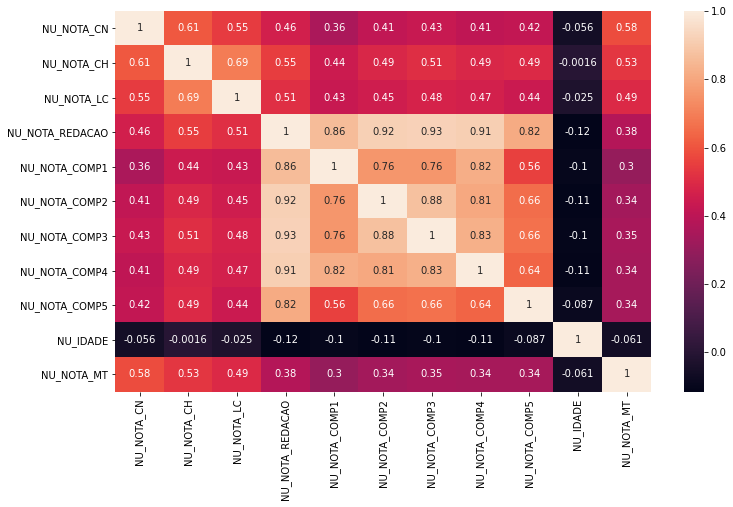

In [20]:
#Verificando a correlação das variáveis contínuas com a variável target (NU_NOTA_MT)
corr = df_train[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_REDACAO','NU_NOTA_COMP1',
                  'NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_IDADE','NU_NOTA_MT']].corr()
plt.figure(figsize=(12,7))
sns.heatmap(corr,annot=True)

> Verificamos que as notas para cada competencia da redação, obviamente, estão altamente correlacionadas com a nota da redação. Por esse motivo, iremos desconsiderar essas variaveis, pois pode surgir problemas de autocorrelação

In [21]:
df_train.drop(columns = ['NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP3', 'NU_NOTA_COMP2', 'NU_NOTA_COMP1'], inplace=True)

df_test.drop(columns = ['NU_NOTA_COMP5', 'NU_NOTA_COMP4', 'NU_NOTA_COMP3', 'NU_NOTA_COMP2', 'NU_NOTA_COMP1'], inplace=True)

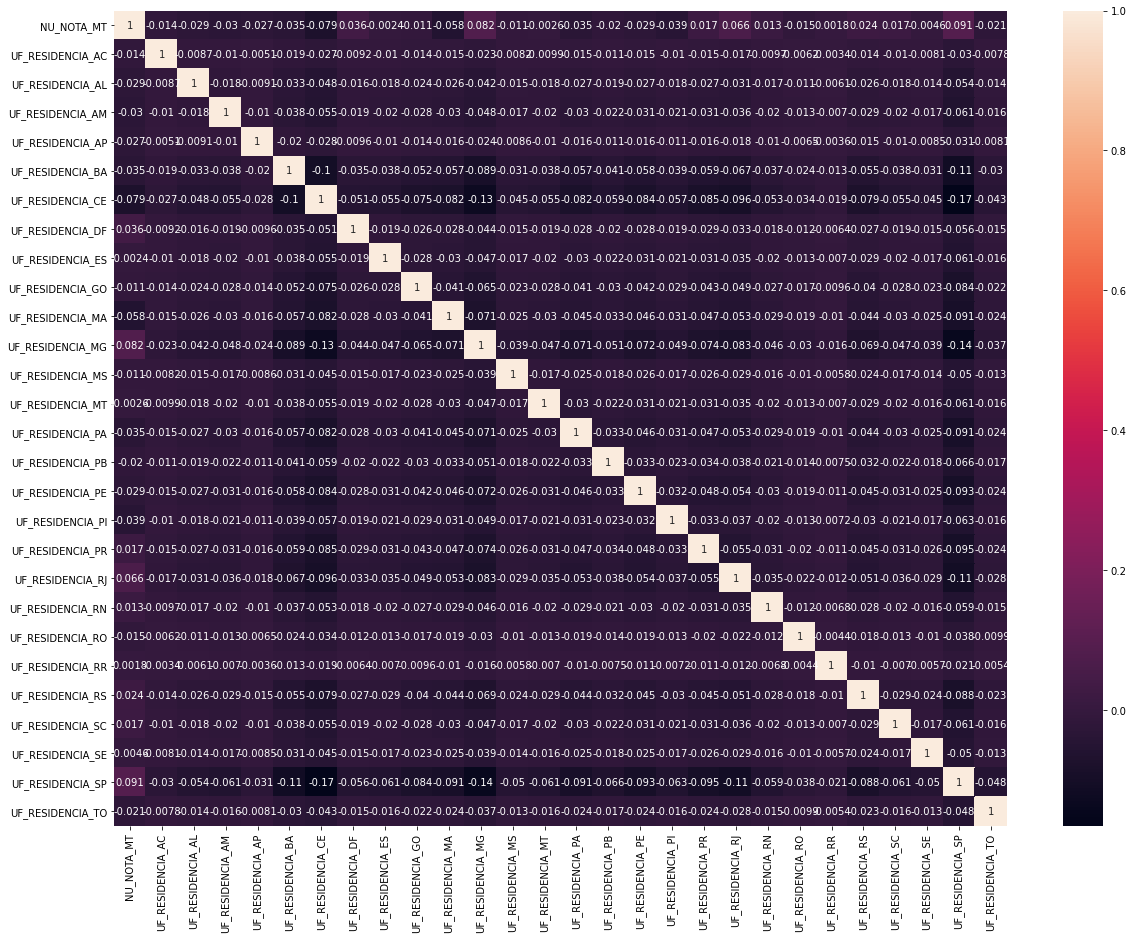

In [24]:
#Verificando a correlação das variáveis com a variável target (NU_NOTA_MT)
corr = df_train[['NU_NOTA_MT','UF_RESIDENCIA_AC', 'UF_RESIDENCIA_AL', 'UF_RESIDENCIA_AM','UF_RESIDENCIA_AP', 'UF_RESIDENCIA_BA', 
                 'UF_RESIDENCIA_CE','UF_RESIDENCIA_DF', 'UF_RESIDENCIA_ES', 'UF_RESIDENCIA_GO','UF_RESIDENCIA_MA', 
                 'UF_RESIDENCIA_MG', 'UF_RESIDENCIA_MS','UF_RESIDENCIA_MT', 'UF_RESIDENCIA_PA', 'UF_RESIDENCIA_PB',
                 'UF_RESIDENCIA_PE', 'UF_RESIDENCIA_PI', 'UF_RESIDENCIA_PR','UF_RESIDENCIA_RJ', 'UF_RESIDENCIA_RN',
                 'UF_RESIDENCIA_RO','UF_RESIDENCIA_RR', 'UF_RESIDENCIA_RS', 'UF_RESIDENCIA_SC','UF_RESIDENCIA_SE', 
                 'UF_RESIDENCIA_SP', 'UF_RESIDENCIA_TO']].corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)

> Verificamos que o estado do candidato não parece ser relevante para explicar a nota

In [25]:
df_train.drop(columns = ['UF_RESIDENCIA_AC', 'UF_RESIDENCIA_AL', 'UF_RESIDENCIA_AM','UF_RESIDENCIA_AP', 'UF_RESIDENCIA_BA', 
                 'UF_RESIDENCIA_CE','UF_RESIDENCIA_DF', 'UF_RESIDENCIA_ES', 'UF_RESIDENCIA_GO','UF_RESIDENCIA_MA', 
                 'UF_RESIDENCIA_MG', 'UF_RESIDENCIA_MS','UF_RESIDENCIA_MT', 'UF_RESIDENCIA_PA', 'UF_RESIDENCIA_PB',
                 'UF_RESIDENCIA_PE', 'UF_RESIDENCIA_PI', 'UF_RESIDENCIA_PR','UF_RESIDENCIA_RJ', 'UF_RESIDENCIA_RN',
                 'UF_RESIDENCIA_RO','UF_RESIDENCIA_RR', 'UF_RESIDENCIA_RS', 'UF_RESIDENCIA_SC','UF_RESIDENCIA_SE', 
                 'UF_RESIDENCIA_SP', 'UF_RESIDENCIA_TO'], inplace=True)

df_test.drop(columns = ['UF_RESIDENCIA_AC', 'UF_RESIDENCIA_AL', 'UF_RESIDENCIA_AM','UF_RESIDENCIA_AP', 'UF_RESIDENCIA_BA', 
                 'UF_RESIDENCIA_CE','UF_RESIDENCIA_DF', 'UF_RESIDENCIA_ES', 'UF_RESIDENCIA_GO','UF_RESIDENCIA_MA', 
                 'UF_RESIDENCIA_MG', 'UF_RESIDENCIA_MS','UF_RESIDENCIA_MT', 'UF_RESIDENCIA_PA', 'UF_RESIDENCIA_PB',
                 'UF_RESIDENCIA_PE', 'UF_RESIDENCIA_PI', 'UF_RESIDENCIA_PR','UF_RESIDENCIA_RJ', 'UF_RESIDENCIA_RN',
                 'UF_RESIDENCIA_RO','UF_RESIDENCIA_RR', 'UF_RESIDENCIA_RS', 'UF_RESIDENCIA_SC','UF_RESIDENCIA_SE', 
                 'UF_RESIDENCIA_SP', 'UF_RESIDENCIA_TO'], inplace=True)

In [26]:
#Verificando a correlação das variáveis com a variável target (NU_NOTA_MT)
corr = df_train[['NU_NOTA_MT', 'TP_SEXO', 'IN_TREINEIRO','deficiencia','INTERNET',
                 'COR_RACA_1', 'COR_RACA_2', 'COR_RACA_3', 'COR_RACA_4', 
                 'COR_RACA_5','ST_CONCLUSAO_1', 'ST_CONCLUSAO_2', 'ST_CONCLUSAO_3', 'ST_CONCLUSAO_4', 
                 'Q001_A', 'Q001_B', 'Q001_C','Q001_D', 'Q001_E', 'Q001_F', 'Q001_G', 'Q001_H',
                 'Q002_A', 'Q002_B','Q002_C', 'Q002_D', 'Q002_E', 'Q002_F', 'Q002_G', 'Q002_H', 'Q006_A','Q006_B', 
                 'Q006_C', 'Q006_D', 'Q006_E', 'Q006_F', 'Q006_G', 'Q006_H','Q006_I', 'Q026_A', 'Q026_B', 'Q026_C', 
                 'renda_>5280']].corr()
corr

,NU_NOTA_MT,TP_SEXO,IN_TREINEIRO,deficiencia,INTERNET,COR_RACA_1,COR_RACA_2,COR_RACA_3,COR_RACA_4,COR_RACA_5,ST_CONCLUSAO_1,ST_CONCLUSAO_2,ST_CONCLUSAO_3,ST_CONCLUSAO_4,Q001_A,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_A,Q002_B,Q002_C,Q002_D,Q002_E,Q002_F,Q002_G,Q002_H,Q006_A,Q006_B,Q006_C,Q006_D,Q006_E,Q006_F,Q006_G,Q006_H,Q006_I,Q026_A,Q026_B,Q026_C,renda_>5280
NU_NOTA_MT,1.000000,-0.184220,-0.022287,-0.004116,0.247551,0.179659,-0.059267,-0.134579,0.011898,-0.022777,0.076108,-0.019278,-0.055512,-0.041698,-0.092224,-0.137570,-0.043975,-0.013242,0.106537,0.194623,0.175223,-0.068328,-0.081465,-0.138056,-0.072149,-0.039940,0.071274,0.193220,0.160370,-0.062886,-0.068221,-0.223680,-0.078984,0.008216,0.026925,0.062724,0.086956,0.120346,0.112192,0.012229,0.000210,-0.015565,0.298000
TP_SEXO,-0.184220,1.000000,0.026916,-0.003023,-0.047235,0.022897,-0.021112,-0.009038,0.023192,-0.028882,0.018730,-0.006059,0.005578,-0.041664,0.031196,0.046143,-0.005840,0.000120,-0.030964,-0.026013,-0.016956,-0.013357,0.032893,0.043603,0.005335,-0.012615,-0.006442,-0.035305,-0.009715,-0.033810,0.007551,0.037596,0.021163,-0.004511,-0.021501,-0.026146,-0.004993,-0.011821,-0.026156,0.059166,-0.018582,-0.051844,-0.040525
IN_TREINEIRO,-0.022287,0.026916,1.000000,-0.016166,-0.010006,0.006001,-0.038554,0.014234,0.012334,0.009848,-0.367584,-0.260120,0.859856,-0.083799,-0.046718,-0.068751,0.013315,0.022150,0.019302,0.051189,0.045154,0.007686,-0.037432,-0.070587,-0.015919,0.007549,0.034036,0.046482,0.046846,0.007290,-0.003223,0.062871,-0.043599,-0.030399,-0.021814,-0.005662,-0.023985,0.004674,0.011511,0.286829,-0.175192,-0.161568,0.047444
deficiencia,-0.004116,-0.003023,-0.016166,1.000000,0.008237,0.014705,-0.011050,-0.002439,-0.006381,-0.003602,-0.008393,-0.001832,-0.009472,0.041420,0.002544,-0.007273,-0.003607,-0.000154,-0.005778,0.013644,0.015195,0.002576,0.015482,0.001809,-0.003730,0.001744,-0.014663,-0.011499,0.023575,0.005799,-0.008059,0.017132,-0.013289,-0.015391,0.014595,-0.009456,-0.009268,-0.007551,-0.005733,0.011831,-0.004532,-0.009506,0.030807
INTERNET,0.247551,-0.047235,-0.010006,0.008237,1.000000,0.177407,-0.048497,-0.133768,0.002381,-0.028380,0.033751,0.007668,-0.047826,-0.012205,-0.117777,-0.146656,-0.029358,0.035693,0.163433,0.135847,0.104410,-0.077265,-0.096062,-0.142189,-0.049503,0.004663,0.096286,0.150418,0.131203,-0.076419,-0.114432,-0.332493,-0.030796,0.087078,0.116169,0.119279,0.132073,0.128378,0.108264,-0.049695,0.020808,0.038061,0.182176
COR_RACA_1,0.179659,0.022897,0.006001,0.014705,0.177407,1.000000,-0.274691,-0.691001,-0.108043,-0.060995,-0.010984,0.020491,-0.011043,0.000581,-0.088407,-0.074357,0.007542,0.011984,0.079182,0.107214,0.080549,-0.072533,-0.076667,-0.083618,-0.010855,0.010672,0.044286,0.092337,0.083308,-0.053782,-0.043326,-0.173899,-0.043000,0.021540,0.062426,0.066839,0.066129,0.082408,0.071683,-0.011589,-0.004892,0.019154,0.146677
COR_RACA_2,-0.059267,-0.021112,-0.038554,-0.011050,-0.048497,-0.274691,1.000000,-0.378093,-0.059117,-0.033374,0.052602,-0.029213,-0.035441,0.002484,0.026573,0.019522,-0.013927,0.000365,-0.011560,-0.031961,-0.027618,0.020182,0.036805,0.025134,0.002081,-0.010946,0.011342,-0.032105,-0.032274,-0.020433,0.017275,0.027486,0.034394,-0.001177,-0.017507,-0.020257,-0.021378,-0.031627,-0.016161,-0.042295,0.040381,0.008480,-0.044176
COR_RACA_3,-0.134579,-0.009038,0.014234,-0.002439,-0.133768,-0.691001,-0.378093,1.000000,-0.148713,-0.083955,-0.016127,0.001621,0.032309,-0.023049,0.061748,0.059946,0.000355,-0.013948,-0.059016,-0.086010,-0.053845,0.050751,0.043832,0.064608,0.008835,-0.007476,-0.040720,-0.070103,-0.056951,0.058844,0.027190,0.144041,0.022483,-0.020917,-0.044913,-0.054319,-0.042762,-0.057593,-0.057781,0.042570,-0.029913,-0.019853,-0.113253
COR_RACA_4,0.011898,0.023192,0.012334,-0.006381,0.002381,-0.108043,-0.059117,-0.148713,1.000000,-0.013127,-0.002203,0.002820,-0.000525,-0.000049,-0.000435,-0.003649,-0.003722,0.009742,0.002382,0.010227,-0.012472,-0.004899,-0.001415,0.006590,-0.004199,-0.

> verificamos que `deficiencia` não é relevante

> `IN_TREINEIRO` está altamente correlacionado com `ST_CONCLUSAO_3`

In [27]:
df_train.drop(columns = ['deficiencia', 'IN_TREINEIRO'], inplace=True)

df_test.drop(columns = ['deficiencia', 'IN_TREINEIRO'], inplace=True)

## dropar valores nulos e cadidatos que não compareceram nos dois dias de prova

In [29]:
df_train = df_train.loc[
      (df_train['NU_NOTA_CN'].notnull())  & (df_train['NU_NOTA_CN'] != 0) 
    & (df_train['NU_NOTA_CH'].notnull())  & (df_train['NU_NOTA_CH'] != 0) 
    & (df_train['NU_NOTA_LC'].notnull())  & (df_train['NU_NOTA_LC'] != 0) 
    & (df_train['NU_NOTA_REDACAO'].notnull()) & (df_train['NU_NOTA_REDACAO'] != 0)
    & (df_train['NU_NOTA_MT'].notnull())  & (df_train['NU_NOTA_MT'] != 0)
]

In [30]:
df_test = df_test.loc[
      (df_test['NU_NOTA_CN'].notnull())  & (df_test['NU_NOTA_CN'] != 0) 
    & (df_test['NU_NOTA_CH'].notnull())  & (df_test['NU_NOTA_CH'] != 0) 
    & (df_test['NU_NOTA_LC'].notnull())  & (df_test['NU_NOTA_LC'] != 0) 
    & (df_test['NU_NOTA_REDACAO'].notnull()) & (df_test['NU_NOTA_REDACAO'] != 0)    
]

## Aplicando o modelo de RandomForest

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [32]:
x_train = df_train.drop(columns = ['NU_NOTA_MT','NU_INSCRICAO'])
y_train = df_train['NU_NOTA_MT']
x_test = df_test.drop(columns = ['NU_INSCRICAO'])

In [33]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

#### separar a base de treino

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(x_train, 
                                                    y_train, 
                                                    test_size = 0.2, 
                                                    random_state = 101)

#### comaparar resultados de Random Forest com Linear Regression

In [35]:
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.metrics import r2_score

# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, Y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, Y_train)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  Y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    
    # mean_absolute_error
    mae = metrics.mean_absolute_error(Y_train, train_pred)
    
    # mean_squared_error
    mse = metrics.mean_squared_error(Y_train, train_pred) 
    
    # R-2 score
    R_2 = r2_score(Y_train, train_pred)
    
    return train_pred, mae, mse, R_2

In [36]:
## Linear Regression
train_pred_linear, mae_linear, mse_linear, R_2_linear = fit_ml_algo(LinearRegression(), 
                                                        X_train, 
                                                        Y_train, 
                                                        10)

print(mae_linear)
print(mse_linear)
print(R_2_linear)

58.82899959360555
5473.146841434371
0.4439189215929541


In [37]:
#Random Forest Regressor
train_pred_forest, mae_forest, mse_forest, R_2_forest = fit_ml_algo(RandomForestRegressor(), 
                                                        X_train, 
                                                        Y_train,
                                                        10)
print(mae_forest)
print(mse_forest)
print(R_2_forest)

58.757231852791875
5427.925666676016
0.4485134702785635


In [38]:
cv_models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest'],
    'MAE': [ mae_linear, mae_forest],
    'R_2': [ R_2_linear, R_2_forest]})
print('---Métricas de desempenho---')
cv_models.sort_values(by='MAE', ascending=True)

---Métricas de desempenho---


,Model,MAE,R_2
1,Random Forest,58.757232,0.448513
0,Linear Regression,58.829000,0.443919


> Vemos que o Random Forest obteve um resultado melhor

### Tunning do Random Forest

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
import time

In [41]:
# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 2000).astype(int),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'warm_start': [True, False]
}

# Estimator para usar no random search
estimator = RandomForestRegressor()

# random search model
rs = RandomizedSearchCV(estimator, param_grid, n_iter=10, scoring='neg_mean_absolute_error', cv=4)

# Fit 
inicio = time.time()
rs.fit(X_train, Y_train)
tempo_gasto = (time.time() - inicio)/60

print('Tempo para fitar o modelo: {} min.'.format(tempo_gasto))

Tempo para fitar o modelo: 16.161911948521933 min.


In [42]:
rs.best_params_

{'warm_start': False,
 'n_estimators': 903,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 46,
 'max_features': 'auto',
 'bootstrap': True}

In [43]:
Y_val_pred = rs.predict(X_val)
R_2 = r2_score(Y_val, Y_val_pred)

print('MAE:', metrics.mean_absolute_error(Y_val, Y_val_pred))
print("Coeficiente de Determinação (R2):", R_2)

MAE: 57.97560913945688
Coeficiente de Determinação (R2): 0.4476885792308496


## Resposta

In [88]:
y_test_pred = rs.predict(x_test)

In [89]:
answer=pd.DataFrame()
answer['NU_INSCRICAO']=df_test['NU_INSCRICAO']
answer['NU_NOTA_MT'] = y_test_pred 
answer.to_csv('answer.csv', index=False, header=True)